In [2]:
import pymysql
import pandas as pd
import sqlalchemy
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='password',db='project')
cursor=conn.cursor()

In [4]:
df=pd.read_sql_query("SELECT * FROM customers",conn)
print(df.head())

   cust_id  first_name  last_name gender         dob              address  \
0        0  first_name  last_name     ge  0000-00-00              address   
1        1       ADAMS      ALLEN      M  2014-01-30   3262 Euclid Avenue   
2        2       ATKIN   ANDERSON      M  2019-09-12     2042 Andell Road   
3        3      THOMAS     OLIVER      M  1998-08-11    3778 Spruce Drive   
4        4      JOSHUA    CHARLIE      F  2004-10-02  4784 Roosevelt Road   

             city         state  zipcode        country     phone_num  \
0            city         state        0        country     phone_num   
1        Longford        Kansas    67458  United States  805-252-6879   
2      Waynesburg      Kentucky    40489  United States  615-246-6831   
3  New Wilmington  Pennsylvania    16142  United States  724-946-1278   
4     Silver Lake     Wisconsin    53170  United States  620-328-3353   

                email  
0             email\r  
1   adams@gmail.com\r  
2   atkin@gmail.com\r  
3 

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
df["email"]=df["email"].map(lambda x: x.rstrip('\r'))

In [7]:
df["email"]

0                 email
1       adams@gmail.com
2       atkin@gmail.com
3      thomas@gmail.com
4      joshua@gmail.com
             ...       
146     White@gmail.com
147    Wilson@gmail.com
148       Lee@gmail.com
149     Jones@gmail.com
150    Taylor@gmail.com
Name: email, Length: 151, dtype: object

In [8]:
def age(born):
    born = datetime.strptime(born, "%yyyy-%mm-%dd").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [9]:
df["age"]=pd.read_sql_query("SELECT YEAR(CURDATE()) - YEAR(dob)from customers",conn)

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [10]:
df["age"].iloc[1:,].astype(int)

1       8
2       3
3      24
4      18
5      12
       ..
146    31
147    34
148    32
149    41
150    31
Name: age, Length: 150, dtype: int64

In [11]:
data = pd.DataFrame({
    'cust_id':df["cust_id"],
    'Name':df["first_name"]+" "+df["last_name"],
    'age':df["age"],
    'contact': df["email"]+" "+df["phone_num"],
    'address':df['address']+"-"+df['city']+"-"+df['zipcode'].astype(str).str.zfill(0),
    'state':df['state']
})

In [12]:
data=data.iloc[1:,:]

In [13]:
data

,cust_id,Name,age,contact,address,state
1,1,ADAMS ALLEN,8,adams@gmail.com 805-252-6879,3262 Euclid Avenue-Longford-67458,Kansas
2,2,ATKIN ANDERSON,3,atkin@gmail.com 615-246-6831,2042 Andell Road-Waynesburg-40489,Kentucky
3,3,THOMAS OLIVER,24,thomas@gmail.com 724-946-1278,3778 Spruce Drive-New Wilmington-16142,Pennsylvania
4,4,JOSHUA CHARLIE,18,joshua@gmail.com 620-328-3353,4784 Roosevelt Road-Silver Lake-53170,Wisconsin
5,5,JAMES CHARLIE,12,james@gmail.com NA,1718 Roosevelt Road-Cunningham-67035,Kansas
...,...,...,...,...,...,...
146,146,White Jackson,31,White@gmail.com 202-393-5858,6758 Woodware Ave-Detroit-39839,Michigan
147,147,Wilson Davis,34,Wilson@gmail.com 443-958-9094,586 Nicollet Mall-Minneapolis-24832,Minnesota
148,148,Lee White,32,Lee@gmail.com 484-484-999,685 Main Street-Tupelo-72732,Mississippi
149,149,Jones Williams,41,Jones@gmail.com 384-855-6374,383 The Paseo-Kanas-34788,Missouri


In [14]:
data.to_csv(r'\Desktop\cust_transformation.csv',index=False,header=False)

In [15]:
df_sale=pd.read_sql_query("SELECT * FROM cust_transformation",conn)
df_sale.head()

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cust_id,name,age,contact,address,state
0,1,ADAMS ALLEN,8,adams@gmail.com 805-252-6879,3262 Euclid Avenue-Longford-67458,Kansas
1,2,ATKIN ANDERSON,3,atkin@gmail.com 615-246-6831,2042 Andell Road-Waynesburg-40489,Kentucky
2,3,THOMAS OLIVER,24,thomas@gmail.com 724-946-1278,3778 Spruce Drive-New Wilmington-16142,Pennsylvania
3,4,JOSHUA CHARLIE,18,joshua@gmail.com 620-328-3353,4784 Roosevelt Road-Silver Lake-53170,Wisconsin
4,5,JAMES CHARLIE,12,james@gmail.com NA,1718 Roosevelt Road-Cunningham-67035,Kansas


# REGION WISE CUSTOMERS

Name of Students =  ['Alabama', 'Alaska', 'ARIZONA', 'CALIFORNIA', 'CHICAGO', 'Colorado', 'East Coast Road', 'Florida', 'Georgia', 'Hawai', 'Idaho', 'Illinois', 'Indiana', 'Kanas', 'Kansas', 'Kentucky', 'Los Angles', 'LosÃ‚Â\xa0Vegas', 'Louisiana', 'Lowa', 'Maine', 'Maryland', 'MASSACHUSETTS', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'MONTANA', 'NEBRASKA', 'Nevada', 'New MExico', 'New York', 'NewÃ‚Â\xa0Jercy', 'North California', 'NORTH CAROLINE', 'North Dakota', 'Ohio', 'OKLAHOMA', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South California', 'South Dakota', 'Tennessee', 'TEXAS', 'Utah', 'VIRGINIA', 'Washington', 'Wisconsin']
Marks of Students =  [1, 3, 1, 3, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 12, 8, 1, 4, 1, 1, 1, 1, 2, 9, 1, 1, 1, 3, 1, 3, 1, 2, 6, 1, 1, 1, 3, 2, 1, 7, 1, 1, 1, 1, 6, 8, 5, 4, 25]


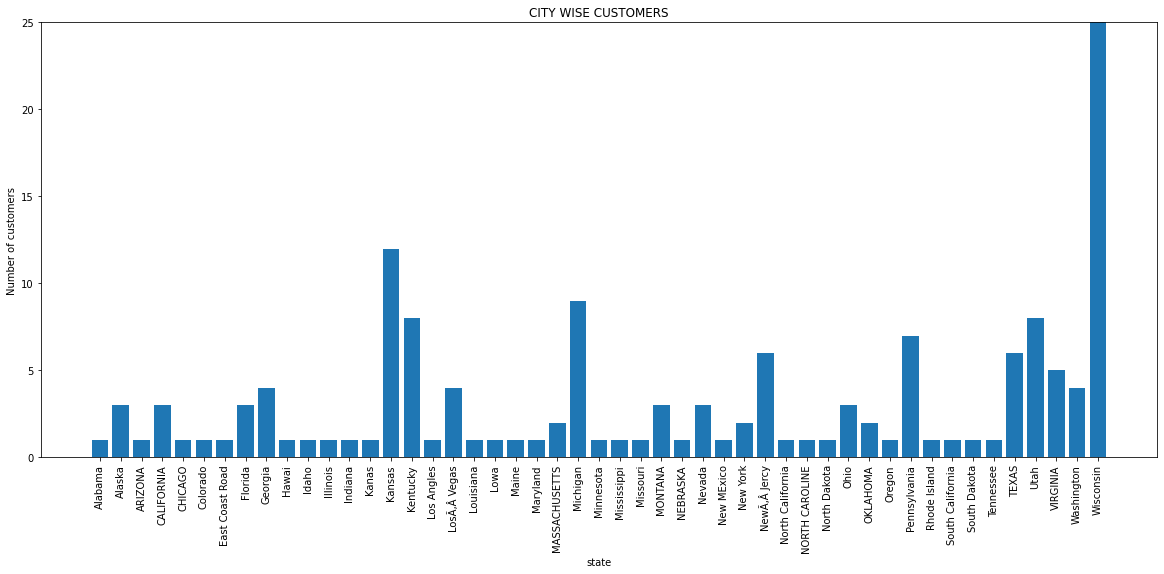

In [17]:
cursor.execute("select state, count(state) from cust_transformation group by state;")
result = cursor.fetchall
state= []
customer_count= []
 
for i in cursor:
    state.append(i[0])
    customer_count.append(i[1])
     
print("Name of Students = ",state)
print("Marks of Students = ",customer_count)
 
plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation=90)
# Visulizing Data using Matplotlib
plt.bar(state,customer_count)
plt.ylim(0, 25)
plt.xlabel("state")
plt.ylabel("Number of customers")
plt.title("CITY WISE CUSTOMERS")
plt.show()

# Count of Maximum and Minimum customers by age - region wise

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


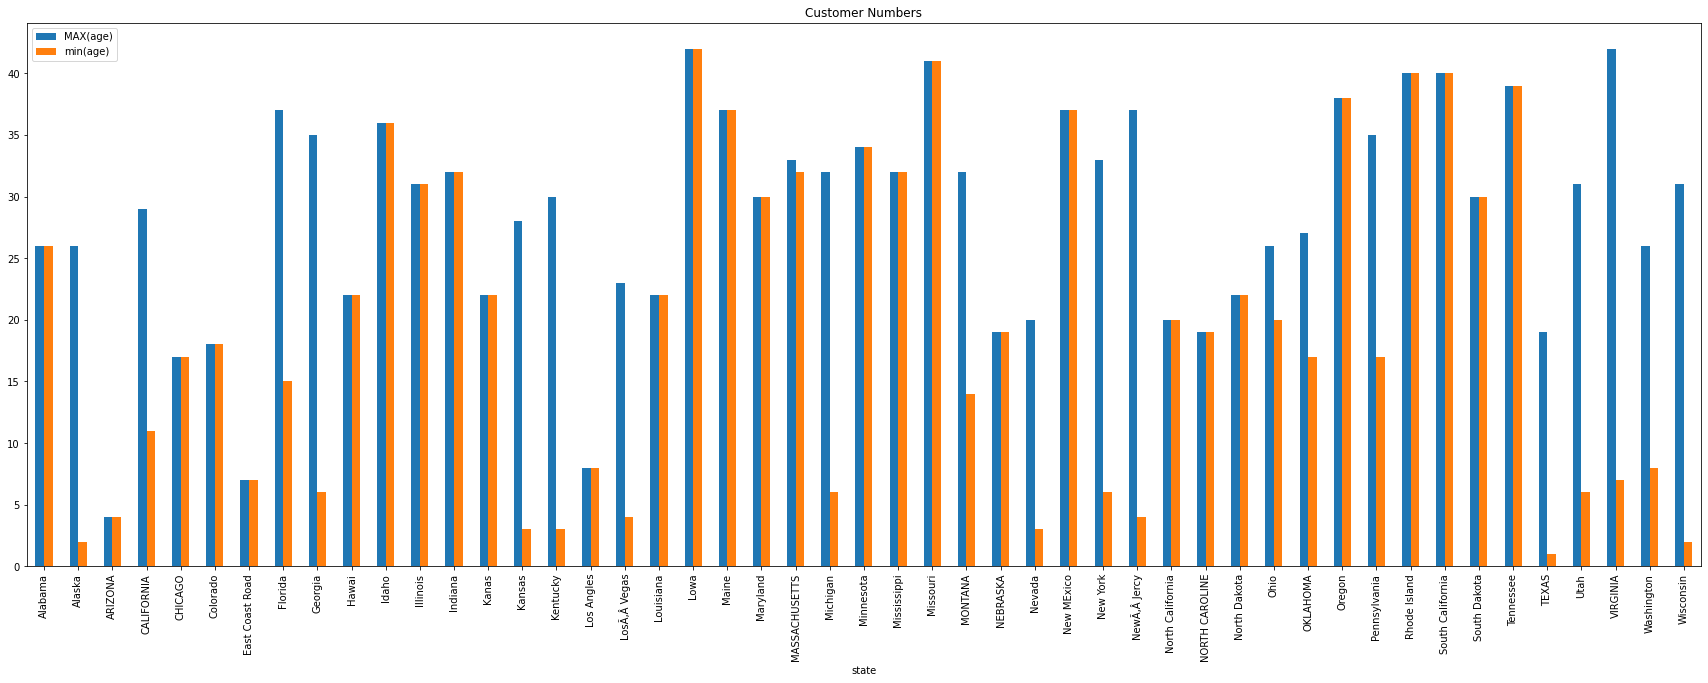

In [18]:
query="SELECT state, MAX(age), min(age) FROM cust_transformation GROUP BY state";
df = pd.read_sql(query,conn)
plt.rcParams['figure.figsize'] = [30, 10]
plot=df.plot.bar(title="Customer Numbers",x='state');

# Customer Analysis - with respect to gender

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


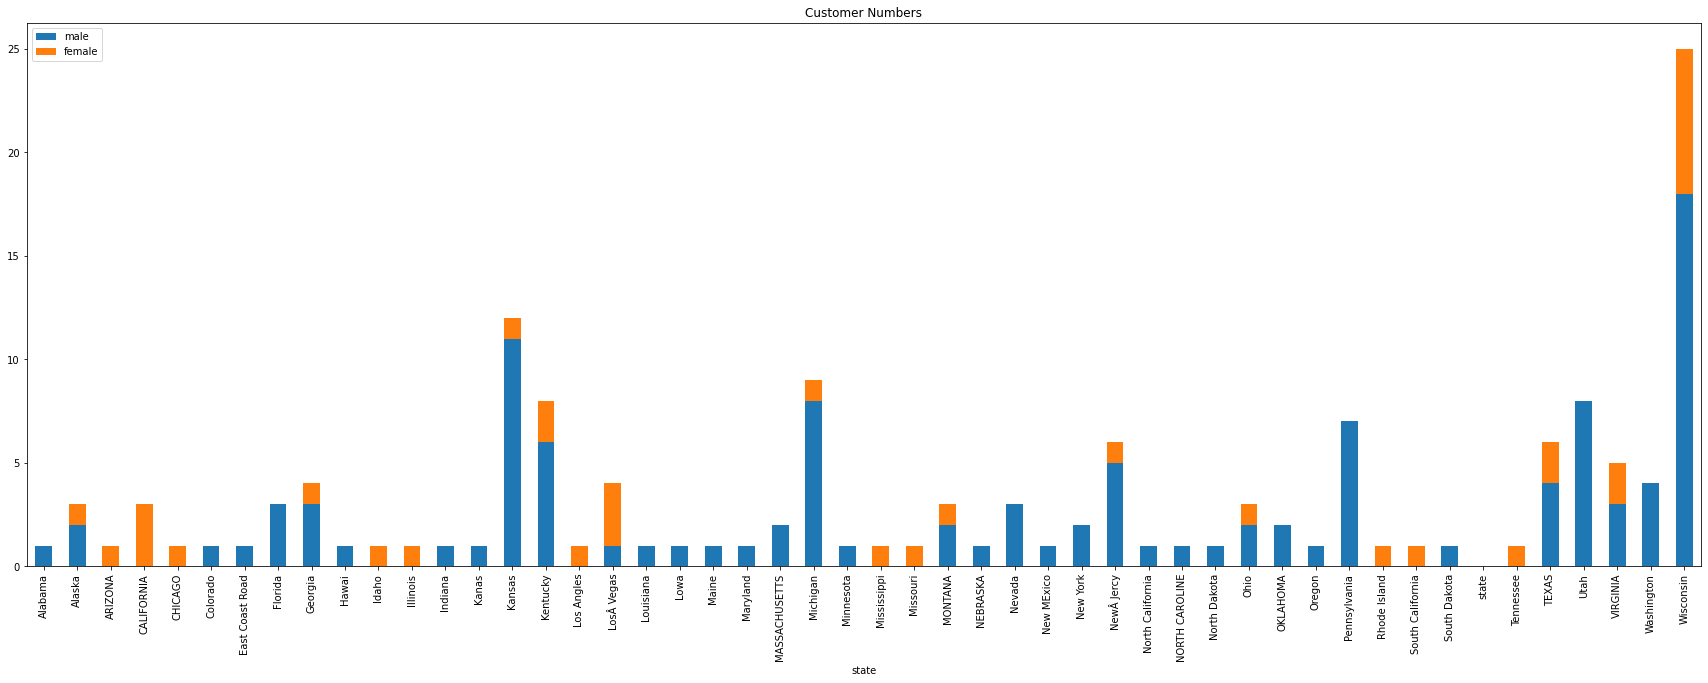

In [19]:
query="select state,  sum(case when gender='M' then 1 else 0 end) as male, sum(case when gender='F' then 1 else 0 end) as female from customers group by state;"
df = pd.read_sql(query,conn)
plot=df.plot.bar(title="Customer Numbers",x='state',stacked=True);
fig = plot.get_figure()
fig.savefig("output3.png")